In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**Step 2: Load and Prepare the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/Iris.csv')

In [ ]:
# Preprocessing if needed (like scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Assuming last column is label

**Step 3: Implementing K-Means**

In [ ]:
from copy import deepcopy

def k_means(X, K):
    # Random initialization of centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    # To store the value of centroids when it updates
    centroids_old = np.zeros(centroids.shape)

    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))

    # Error func. - Distance between new centroids and old centroids
    error = np.linalg.norm(centroids - centroids_old)

    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # Storing the old centroid values
        centroids_old = deepcopy(centroids)

        # Finding the new centroids by taking the average value
        for i in range(K):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            centroids[i] = np.mean(points, axis=0)

        error = np.linalg.norm(centroids - centroids_old)

    return clusters, centroids


**Step 4: Running the Algorithm**

In [ ]:
# Number of clusters
K = 3
clusters, centroids = k_means(df_scaled, K)

clusters, centroids

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647],
        [ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
        [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862]]))

**Step 5: Visualizing the Clustering Process**

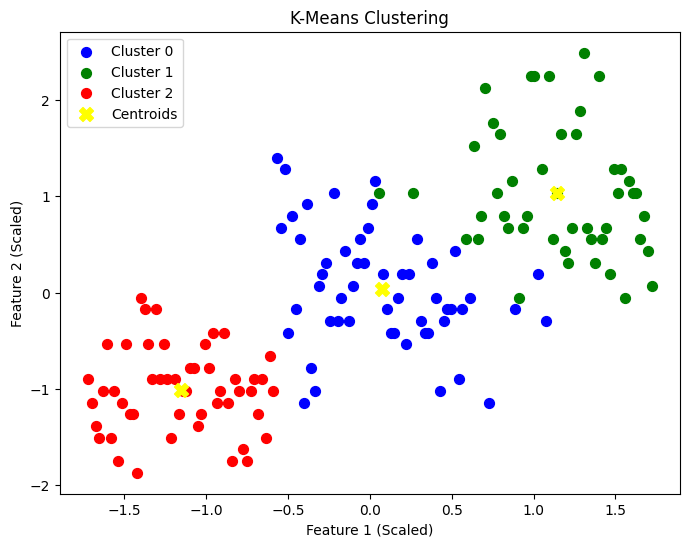

In [ ]:
# Select two dimensions to visualize (for example, the first two features)
x = df_scaled[:, 0]  # First feature
y = df_scaled[:, 1]  # Second feature

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
colors = ['blue', 'green', 'red']
for i in range(K):
    plt.scatter(x[clusters == i], y[clusters == i], s=50, c=colors[i], label=f'Cluster {i}')

# Plot centroids
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]
plt.scatter(centroids_x, centroids_y, s=100, c='yellow', marker='X', label='Centroids')

# Add title and labels
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()

# Show plot
plt.show()
